In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import sys
sys.path.append("../")
from src.models.naive import Naive

In [2]:
def train_and_predict(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray):
    model = Naive()
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [3]:
def train_eval_mape(X_train, y_train, X_test, y_test):
    y_pred = train_and_predict(X_train=X_train, y_train=y_train, X_test=X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mape

In [4]:
def create_train_test_df_from_split_dir(split_dir):
    train = pd.read_csv(os.path.join(split_dir, "train.csv"), delimiter=";", header=0)
    test = pd.read_csv(os.path.join(split_dir, "test.csv"), delimiter=";", header=0)

    X_train, y_train = (
        train.drop(columns=["price"]).to_numpy(),
        train["price"].to_numpy(),
    )
    X_test, y_test = test.drop(columns=["price"]).to_numpy(), test["price"].to_numpy()

    return X_train, y_train, X_test, y_test

In [5]:
def train_plot_preds_from_split_dir(split_dir):
    X_train, y_train, X_test, y_test = create_train_test_df_from_split_dir(split_dir)
    y_pred = train_and_predict(X_train=X_train, y_train=y_train, X_test=X_test)
    
    df_y_train = pd.DataFrame(y_train, columns=["price"])
    df_y_train["type"] = "truth"
    df_y_train.reset_index(inplace=True)
    
    df_y_test = pd.DataFrame(y_test, columns=["price"])
    df_y_test["type"] = "truth"
    df_y_test.reset_index(inplace=True)

    df_y_pred = pd.DataFrame(y_pred, columns=["price"])
    df_y_pred["type"] = "pred"
    df_y_pred.reset_index(inplace=True)

    df_y_test["index_offset"] = len(df_y_train)
    df_y_test["index"] = df_y_test["index"] + df_y_test["index_offset"] + 1

    df_y_pred["index_offset"] = len(df_y_train)
    df_y_pred["index"] = df_y_pred["index"] + df_y_pred["index_offset"] + 1

    df_all = pd.concat([df_y_train, df_y_test, df_y_pred], ignore_index=True)
    df_all = df_all.sort_values(by="index")    
    sns.lineplot(data=df_all, x="index", y="price", hue="type")

In [6]:
def train_eval_mape_from_split_dir(split_dir):
    X_train, y_train, X_test, y_test = create_train_test_df_from_split_dir(split_dir)
    return train_eval_mape(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [ ]:
time_series_split_dir = "../data/lagged_features/time_series_split"
# for each directory in time_series_split_dir, train and evaluate a model
split_dirs = [os.path.join(time_series_split_dir, split_dir) for split_dir in os.listdir(time_series_split_dir)]
split_dirs = sorted(split_dirs, key=lambda x: int(x.split("/")[-1]))
mape = [train_eval_mape_from_split_dir(split_dir) for split_dir in split_dirs]

In [18]:
avg_mape = sum(mape) / len(mape)
avg_mape


np.float64(1327234298347429.0)

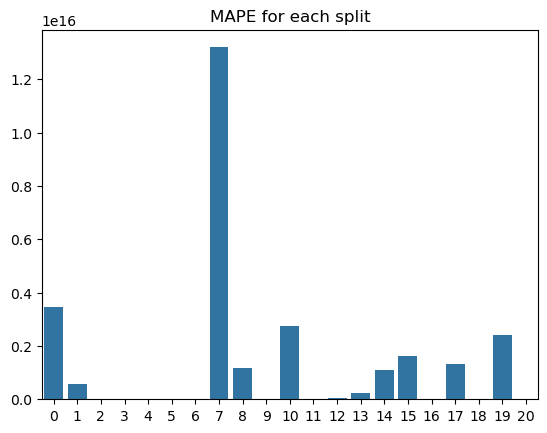

In [10]:
def plot_mape_for_split_indices(split_dirs, mape):
    split_indices = [split_dir.split("/")[-1] for split_dir in split_dirs]
    
    # set the title of the plot
    sns.barplot(x=split_indices, y=mape)
    plt.title("MAPE for each split")
    

plot_mape_for_split_indices(split_dirs, mape)

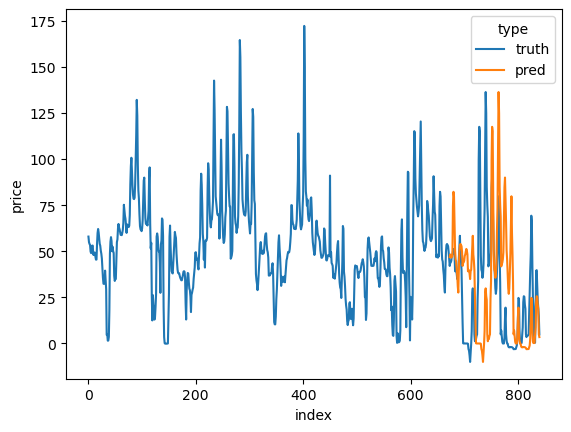

In [14]:
train_plot_preds_from_split_dir("../data/lagged_features/time_series_split/7")


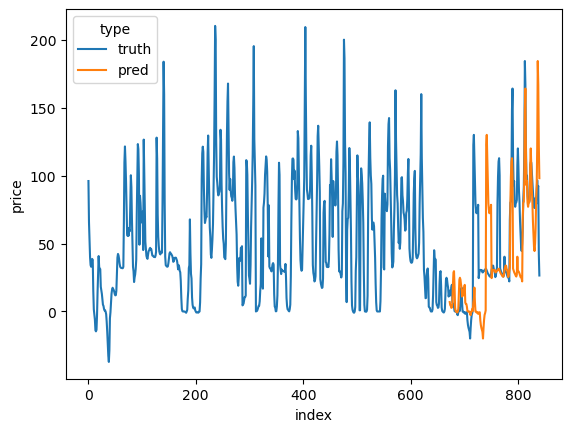

In [11]:
train_plot_preds_from_split_dir("../data/lagged_features/time_series_split/20")

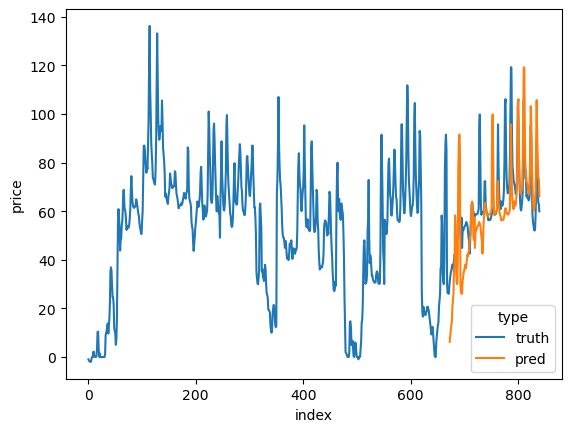

In [12]:
train_plot_preds_from_split_dir("../data/lagged_features/time_series_split/2")
